# Part 2: Explore data - EDA

In this tutorial you learn to perform the following actions:

1. Read the data stored from a delta table in the lakehouse.
1. Convert a Spark DataFrame to Pandas DataFrame, which python visualization libraries support.
1. Use Data Wrangler to perform initial data cleaning and transformation.
1. Perform exploratory data analysis using `seaborn`.


## Read raw data from the lakehouse

Read raw data from the **Files** section of the lakehouse. You uploaded this data in the previous notebook. Make sure you have attached the same lakehouse you used in Part 1 to this notebook before you run this code.

In [2]:
df = (
    spark.read.option("header", True)
    .option("inferSchema", True)
    .csv("Files/churn/raw/churn.csv")
    .cache()
)

StatementMeta(, 13b01f4e-9971-4da9-8f67-f24ab51c25fb, 4, Finished, Available, Finished)

## Create a pandas DataFrame from the dataset

Convert the spark DataFrame to pandas DataFrame for easier processing and visualization.

In [3]:
df = df.toPandas()

StatementMeta(, 13b01f4e-9971-4da9-8f67-f24ab51c25fb, 5, Finished, Available, Finished)

### Display raw data

Explore the raw data with `display`, do some basic statistics and show chart views. You first need to import required libraries for data visualization such as `seaborn`, which is a Python data visualization library to provide a high-level interface for building visuals on DataFrames and arrays. Learn more about [`seaborn`](https://seaborn.pydata.org/). 

In [1]:
import seaborn as sns
sns.set_theme(style="whitegrid", palette="tab10", rc = {'figure.figsize':(9,6)})
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import rc, rcParams
import numpy as np
import pandas as pd
import itertools

StatementMeta(, 13b01f4e-9971-4da9-8f67-f24ab51c25fb, 3, Finished, Available, Finished)

In [4]:
display(df, summary=True)

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 6, Finished, Available, Finished)

SynapseWidget(Synapse.DataFrame, 2677881f-edb1-4f5a-988f-db08a9e9100f)

## Use Data Wrangler to perform initial data cleansing

Data Wrangler is a notebook-based tool that provides an immersive experience to conduct exploratory data analysis and cleansing. 


If you didn't use Data Wrangler, you can instead use this next code cell. 

This code is similar to the code produced by Data Wrangler, but adds in the argument `inplace=True` to each of the generated steps. By setting `inplace=True`, pandas will overwrite the original DataFrame instead of producing a new DataFrame as an output.

In [5]:
# Modified version of code generated by Data Wrangler 
# Modification is to add in-place=True to each step

# Define a new function that include all above Data Wrangler operations
def clean_data(df):
    # Drop rows with missing data across all columns
    df.dropna(inplace=True)
    # Drop duplicate rows in columns: 'RowNumber', 'CustomerId'
    df.drop_duplicates(subset=['RowNumber', 'CustomerId'], inplace=True)
    # Drop columns: 'RowNumber', 'CustomerId', 'Surname'
    df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)
    return df

df_clean = clean_data(df.copy())
df_clean.head()

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 7, Finished, Available, Finished)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Explore the data

Display some summaries and visualizations of the cleaned data.

### Determine categorical, numerical, and target attributes

Use this code to determine categorical, numerical, and target attributes.

In [6]:
# Determine the dependent (target) attribute
dependent_variable_name = "Exited"
print(dependent_variable_name)
# Determine the categorical attributes
categorical_variables = [col for col in df_clean.columns if col in "O"
                        or df_clean[col].nunique() <=5
                        and col not in "Exited"]
print(categorical_variables)
# Determine the numerical attributes
numeric_variables = [col for col in df_clean.columns if df_clean[col].dtype != "object"
                        and df_clean[col].nunique() >5]
print(numeric_variables)

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 8, Finished, Available, Finished)

Exited
['Geography', 'Gender', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']


### The five-number summary 

Show the five-number summary (the minimum score, first quartile, median, third quartile, the maximum score) for the numerical attributes, using box plots.

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 9, Finished, Available, Finished)

/tmp/ipykernel_6757/4236202361.py:4: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


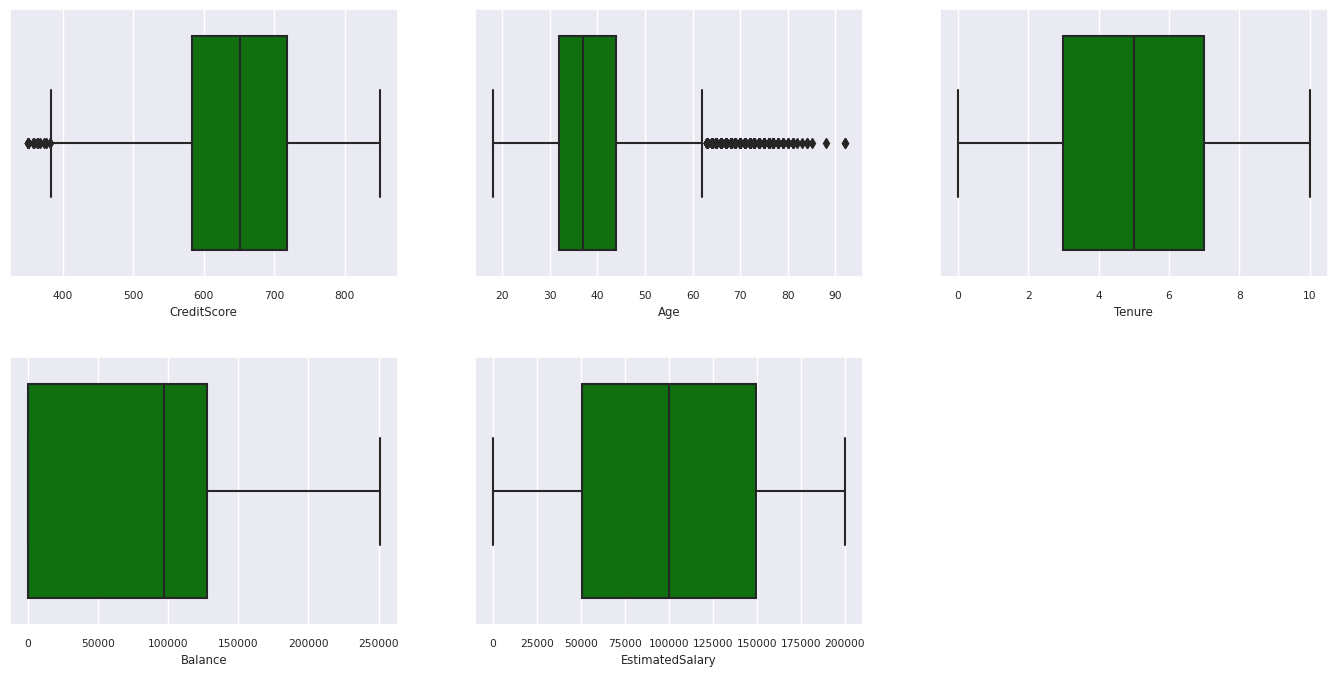

In [7]:
df_num_cols = df_clean[numeric_variables]
sns.set(font_scale = 0.7) 
fig, axes = plt.subplots(nrows = 2, ncols = 3, gridspec_kw =  dict(hspace=0.3), figsize = (17,8))
fig.tight_layout()
for ax,col in zip(axes.flatten(), df_num_cols.columns):
    sns.boxplot(x = df_num_cols[col], color='green', ax = ax)
fig.delaxes(axes[1,2])


## Distribution of exited and nonexited customers 

Show the distribution of exited versus nonexited customers across the categorical attributes. 

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 10, Finished, Available, Finished)

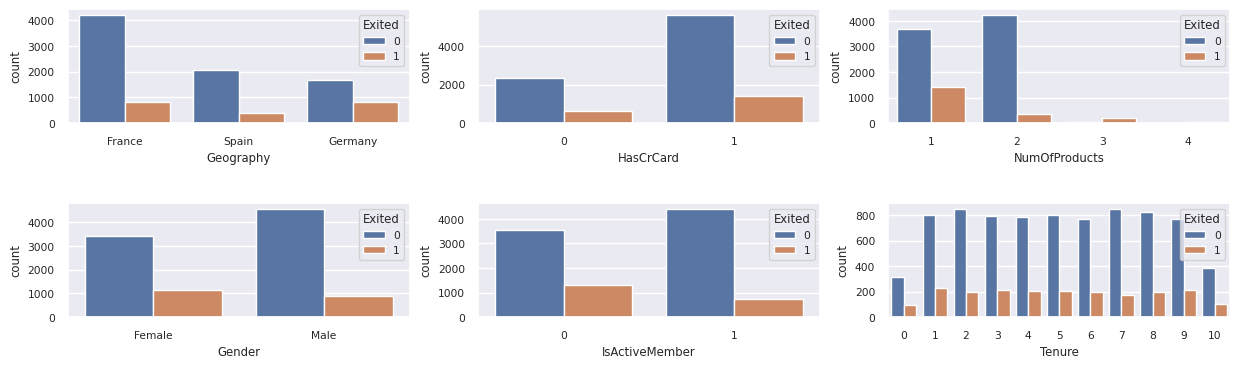

In [8]:
attr_list = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'NumOfProducts', 'Tenure']
fig, axarr = plt.subplots(2, 3, figsize=(15, 4))
for ind, item in enumerate (attr_list):
    sns.countplot(x = item, hue = 'Exited', data = df_clean, ax = axarr[ind%2][ind//2])
fig.subplots_adjust(hspace=0.7)

### Distribution of numerical attributes

Show the frequency distribution of numerical attributes using histogram. 

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 11, Finished, Available, Finished)

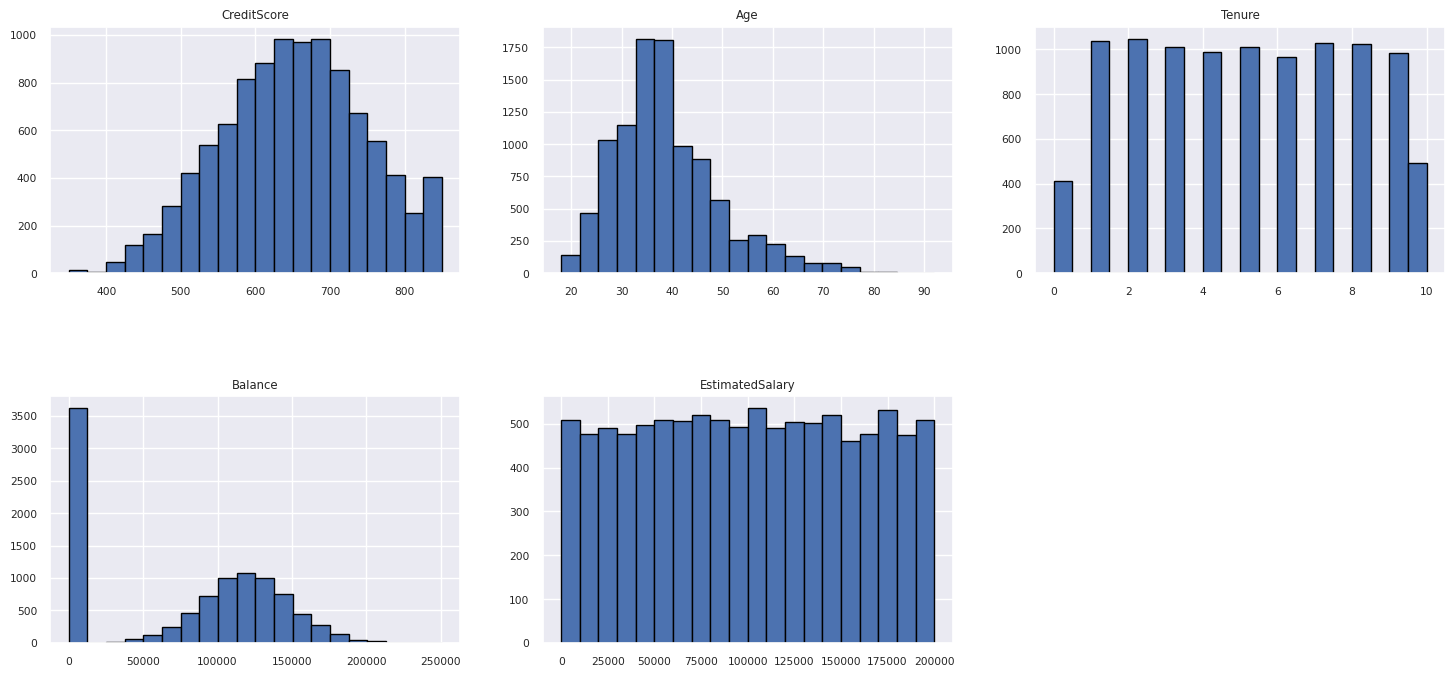

In [9]:
columns = df_num_cols.columns[: len(df_num_cols.columns)]
fig = plt.figure()
fig.set_size_inches(18, 8)
length = len(columns)
for i,j in itertools.zip_longest(columns, range(length)):
    plt.subplot((length // 2), 3, j+1)
    plt.subplots_adjust(wspace = 0.2, hspace = 0.5)
    df_num_cols[i].hist(bins = 20, edgecolor = 'black')
    plt.title(i)
plt.show()

## Perform feature engineering

Perform feature engineering to generate new attributes based on current attributes:

In [10]:
df_clean["NewTenure"] = df_clean["Tenure"]/df_clean["Age"]
df_clean["NewCreditsScore"] = pd.qcut(df_clean['CreditScore'], 6, labels = [1, 2, 3, 4, 5, 6])
df_clean["NewAgeScore"] = pd.qcut(df_clean['Age'], 8, labels = [1, 2, 3, 4, 5, 6, 7, 8])
df_clean["NewBalanceScore"] = pd.qcut(df_clean['Balance'].rank(method="first"), 5, labels = [1, 2, 3, 4, 5])
df_clean["NewEstSalaryScore"] = pd.qcut(df_clean['EstimatedSalary'], 10, labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 12, Finished, Available, Finished)

Data Wrangler can also be used to perform one-hot encoding.  To do so, re-open Data Wrangler.  This time, select the `df_clean` data. Then select **One-hot encode** under **Formulas**.  

Or use this code:

In [11]:
# This is the same code that Data Wrangler will generate
 
import pandas as pd
 
def clean_data(df_clean):
    # One-hot encode columns: 'Geography', 'Gender'
    df_clean = pd.get_dummies(df_clean, columns=['Geography', 'Gender'])
    return df_clean
 
df_clean_1 = clean_data(df_clean.copy())
df_clean_1.head()

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 13, Finished, Available, Finished)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,NewTenure,NewCreditsScore,NewAgeScore,NewBalanceScore,NewEstSalaryScore,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0.047619,3,6,1,6,True,False,False,True,False
1,608,41,1,83807.86,1,0,1,112542.58,0,0.024390,2,6,3,6,False,False,True,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,0.190476,1,6,5,6,True,False,False,True,False
3,699,39,1,0.00,2,0,0,93826.63,0,0.025641,5,5,1,5,True,False,False,True,False
4,850,43,2,125510.82,1,1,1,79084.10,0,0.046512,6,6,4,4,False,False,True,True,False


## Summary of observations from the exploratory data analysis

- Most of the customers are from France comparing to Spain and Germany, while Spain has the lowest churn rate comparing to France and Germany.
- Most of the customers have credit cards.
- There are customers whose age and credit score are above 60 and below 400, respectively, but they can't be considered as outliers.
- Very few customers have more than two of the bank's products.
- Customers who aren't active have a higher churn rate.
- Gender and tenure years don't seem to have an impact on customer's decision to close the bank account.

## Create a delta table for the cleaned data

You'll use this data in the next notebook of this series.

In [12]:
table_name = "df_clean"
# Create Spark DataFrame from pandas
sparkDF=spark.createDataFrame(df_clean_1) 
sparkDF.write.mode("overwrite").format("delta").save(f"Tables/{table_name}")
print(f"Spark dataframe saved to delta table: {table_name}")

StatementMeta(, f9f15430-5b18-47ec-ba63-b61fb541ca49, 14, Finished, Available, Finished)

Spark dataframe saved to delta table: df_clean


## Next step

GoTO: "Part 3: Train and register machine learning models"